Nguyễn Khánh Huyền

In [15]:
import datetime
import numpy as np

Các nhóm Design Pattern

**1. Nhóm Creational <Khởi tạo>**
- Tập trung vào việc tạo ra các đối tượng một cách linh hoạt và hiệu quả
- ví dụ như: cách thức tạo ra các đối tượng, tái sử dụng code, kiểm soát việc khởi tạo đối tượng trong các tình huống khác nhau
- Factory Method, Singleton 

**2. Nhóm Structural <Cấu trúc>**
- Tập trung vào việc sắp xếp các đối tượng thành các cấu trúc logic để đáp ứng các yêu cầu khác nhau
- Ví dụ như: cách thức kết hợp các đối tượng để tạo ra cấu trúc lớn hơn, cách chia sẻ dữ liệu giữa các đối tượng, cách thức thay đổi cấu trúc của 1 applications mà không ảnh hưởng đến its method
- Adapter, Facade, Bridge, Proxy 

**3. Nhóm Behavioral <Hành vi>**
- Tập trung vào việc xác định cách thức các đối tượng giao tiếp và tương tác với nhau
- Ví dụ như: cách thức objects chia sẻ dữ liệu và chức năng, cách đối tượng phản ứng với sự kiện, cách các đối tượng được tổ chức thành các mô hình hành vi
- Chain of Responsibility, Command, Strategy

1. Singleton Pattern
- Create just **1** instance cho toàn bộ lifetime của program
- Limit concurrent(đồng thời) access to a shared resource
- To create a global point access (điểm truy cập global) cho toàn bộ resource


In [47]:
# Implement a singleton class LoggerSingleton that has a method log(msg) that logs a message with a timestamp to a file called log.txt. 

class LoggerSingleton:
    _instance = None

    def __init__(self, filename):
        self.filename = filename
        self.file = open(self.filename, 'a')  # Open file in append mode to avoid overwriting existing logs

    def log(self, msg):
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        self.file.write(f'\n{timestamp}: {msg}')

    @classmethod
    def get_instance(cls, filename):
        if cls._instance is None:
            cls._instance = LoggerSingleton(filename)
        return cls._instance


In [46]:
# Usage
# Get a singleton instance of the logger
logger = LoggerSingleton.get_instance('log.txt')

# Log messages
logger.log("This is a log message.")
logger.log("Another log message.")

# Close the file when done
logger.file.close()


In [48]:
# First instance creation
logger_instance1 = LoggerSingleton.get_instance('log.txt')
logger_instance1.log("This is a log message from the first instance.")
logger_instance1.file.close()
# Second instance creation attempt
logger_instance2 = LoggerSingleton.get_instance('log.txt')

# Check if both instances are the same
print(logger_instance1 is logger_instance2)  # Output: True


True


How the `LoggerSingleton` class implements the Singleton design pattern and the properties associated with it:

1. **Private Instance Variable `_instance`:**
   - The `_instance` variable is declared as private within the class. This ensures that it cannot be accessed or modified directly from outside the class.

2. **`__init__` Method:**
   - The `__init__` method initializes the `LoggerSingleton` object by opening the specified log file in append mode (`'a'`). It ensures that each instance of the class opens the same log file for writing.

3. **`log` Method:**
   - The `log` method is responsible for logging messages to the file. It appends the current timestamp to each message before writing it to the log file.

4. **`get_instance` Class Method:**
   - The `get_instance` method is a class method responsible for creating and returning the singleton instance of the `LoggerSingleton` class.
   - It checks whether the `_instance` variable is `None`. If it is, it creates a new instance of `LoggerSingleton` with the specified filename. If `_instance` is not `None`, it returns the existing instance.
   - By using a class method to access and control the creation of instances, the class ensures that only one instance of `LoggerSingleton` is created throughout the program's execution.

5. **Lazy Initialization:**
   - The Singleton instance is lazily initialized. It is created only when `get_instance` is called for the first time. Subsequent calls to `get_instance` return the existing instance without creating a new one.
   
6. **Thread Safety (Optional):**
   - The implementation is not inherently thread-safe. If multiple threads attempt to create the singleton instance simultaneously, it could result in the creation of multiple instances. To ensure thread safety, additional synchronization mechanisms such as locks or thread-safe initialization techniques can be employed.

In summary, the `LoggerSingleton` class exhibits the key properties of the Singleton design pattern by ensuring that only one instance of the class exists throughout the program's execution, providing global access to that instance, and controlling the instantiation process to prevent multiple instances from being created.

2. Factory Pattern
- Use case: Khi chúng ta muốn tạo ra một object của một type nào đấy, nhưng chúng ta không biết rõ mình sẽ phải tạo ra cái gì, mà nó phải dựa vào một số điều kiện business logic đầu vào để tạo ra object tương ứng
- Cung cấp một giao diện để tạo ra các đối tượng thuộc một họ hàng, nhưng không nhất thiết phải xác định lớp cụ thể của đối tượng sẽ được tạo ra.
- Tạo ra một cách khởi tạo object mới thông qua một interface chung
- Che giấu quá trình xử lý logic của phương thức khởi tạo
- Giảm sự phụ thuộc, dễ dàng mở rộng
- Giảm khả năng gây lỗi compile
- Ví dụ: Giả sử ta có 3 class Dog, Cat, Duck cùng implement interface Animal. Khi mà chúng ta muốn khởi tạo ra một object có type là Animal, nhưng mà ta chưa biết sẽ phải tạo ra con chó, mèo hay con vịt mà nó phụ thuộc vào một số điều kiện, nếu dùng logic code để tạo ra object này ở nhiều nơi khác nhau, thì code sẽ bị lặp -> nhét business logic để khởi tạo ra những object vào 1 cái **factory method** -> tùy vào từng trường hợp, chúng ta chọn sử dụng fatory method với các parameter khác nhau để quyết định khởi tạo object nào


In [50]:
class IPizza():
    def __init__(self):
        pass
    def get_price(self):
        pass

class HamAndMushroomPizza(IPizza):
    def __init__(self):
        self.price = 8.5

    def get_price(self):
        return self.price

class DeluxePizza(IPizza):
    def __init__(self):
        self.price = 10.5

    def get_price(self):
        return self.price

class SeafoodPizza(IPizza):
    def __init__(self):
        self.price = 11.5

    def get_price(self):
        return self.price

class PizzaFactory:
    class PizzaType:
        HamMushroom = 0
        Deluxe = 1
        Seafood = 2

    @staticmethod
    def create_pizza(pizza_type):
        if pizza_type == PizzaFactory.PizzaType.HamMushroom:
            return HamAndMushroomPizza()
        elif pizza_type == PizzaFactory.PizzaType.Deluxe:
            return DeluxePizza()
        elif pizza_type == PizzaFactory.PizzaType.Seafood:
            return SeafoodPizza()

if __name__ == "__main__":
    pizza_type = PizzaFactory.PizzaType.Seafood
    pizza = None

    # # Normal
    # if pizza_type == PizzaFactory.PizzaType.Seafood:
    #     pizza = SeafoodPizza()
    # elif pizza_type == PizzaFactory.PizzaType.Deluxe:
    #     pizza = DeluxePizza()
    # else:
    #     pizza = HamAndMushroomPizza()

    # Using Factory Method
    pizza = PizzaFactory.create_pizza(pizza_type)

    print(pizza.get_price())


11.5


3. Chain of Responsibility
- Cho phép một object gửi 1 yêu cầu nhưng không biết object nào sẽ nhận và xử lý nó. Điều này được thực hiện bằng cách kết nối các đối tượng nhận yêu cầu thành 1 chuỗi(chain) và gửi yêu cầu theo chuỗi đó cho đến khi có một đối tượng xử lý nó
- Hoạt động như một Linked List and use recursive traversal duyệt qua các phần tử
- Usecase:Có nhiều hơn một đối tượng có khả thực xử lý một yêu cầu trong khi đối tượng cụ thể nào xử lý yêu cầu đó lại phụ thuộc vào ngữ cảnh sử dụng, muốn gửi yêu cầu đến một trong số vài đối tượng nhưng không xác định đối tượng cụ thể nào sẽ xử lý yêu cầu đó


In [53]:
class IHandler():
    @property
    def successor(self):
        pass

    @successor.setter
    def successor(self, successor):
        pass

    def request_order(self, amount):
        pass

class MiniStorage(IHandler):
    def __init__(self):
        self._successor = None

    @property
    def successor(self):
        return self._successor

    @successor.setter
    def successor(self, successor):
        self._successor = successor

    def request_order(self, amount):
        if amount < 10:
            print("Mini storage: I can handle less than 10 quantity. DONE!")
        else:
            print("Mini storage: I received the request but I can not handle more than 10 quantity. Passed to Medium storage")
            if self.successor:
                self.successor.request_order(amount)

class MediumStorage(IHandler):
    def __init__(self):
        self._successor = None

    @property
    def successor(self):
        return self._successor

    @successor.setter
    def successor(self, successor):
        self._successor = successor

    def request_order(self, amount):
        if amount < 50:
            print("Medium storage: I can handle less than 50 quantity. DONE!")
        else:
            print("Medium storage: I received the request but I can not handle more than 50 quantity. Passed to Big storage")
            if self.successor:
                self.successor.request_order(amount)

class BigStorage(IHandler):
    def __init__(self):
        self._successor = None

    @property
    def successor(self):
        return self._successor

    @successor.setter
    def successor(self, successor):
        self._successor = successor

    def request_order(self, amount):
        if amount < 100:
            print("Big handler: I can handle less than 100 quantity. DONE!")
        else:
            print("Big storage: I received the request but I can not handle more than 100 quantity. Passed to Factory")
            if self.successor:
                self.successor.request_order(amount)

class FactoryHandler(IHandler):
    def __init__(self):
        self._successor = None

    @property
    def successor(self):
        return self._successor

    @successor.setter
    def successor(self, successor):
        self._successor = successor

    def request_order(self, amount):
        print("Factory: I received the request. You will receive product from us")

class ChainOfHandlers:
    def __init__(self):
        self._mini = MiniStorage()
        self._medium = MediumStorage()
        self._big = BigStorage()
        self._factory = FactoryHandler()

        self._mini.successor = self._medium
        self._medium.successor = self._big
        self._big.successor = self._factory

    def handle(self, amount):
        self._mini.request_order(amount)

if __name__ == "__main__":
    chain = ChainOfHandlers()
    amount = int(input("Enter quantity: "))
    chain.handle(amount)


Mini storage: I received the request but I can not handle more than 10 quantity. Passed to Medium storage
Medium storage: I can handle less than 50 quantity. DONE!


4. Adapter 
- Chuyển đổi interface của 1 class thành 1 interface khác mà phía clients muốn. Cho phép 2 interface không liên quan làm việc cùng nhau
- Adapter giữ vai trò trung gian, cho phép cá class có các interface khác nhau giao tiếp với nhau qua interface trung gian
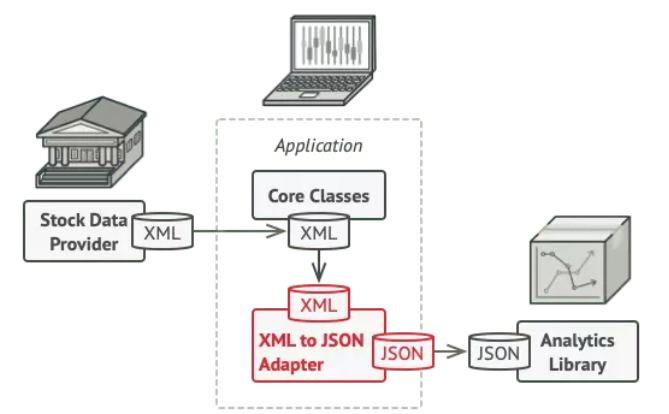
Đây là cách nó hoạt động:
- Adapter có một interface tương thích với một trong các object hiện có.
- Với việc sử dụng interface này, object hiện có có thể gọi các phương thức của Adapter một cách an toàn.
- Khi được gọi, Adapter sẽ chuyển yêu cầu đến object thứ hai, nhưng theo một định dạng và thứ tự mà object thứ hai mong đợi
- New class - adapter, interface có sẵn không tương thích - adaptee, interface người dùng mong muốn - Target
- Kiến trúc:
    - Object Adapter - Composition
    - Class Adapter - Inheritance
- Comparision
    - Sự khác biệt chính là Class Adapter sử dụng Inheritance (kế thừa) để kết nối Adapter và Adaptee trong khi Object Adapter sử dụng Composition (chứa trong) để kết nối Adapter và Adaptee.
    - Trong cách tiếp cận Class Adapter, nếu một Adaptee là một class và không phải là một interface thì Adapter sẽ là một lớp con của Adaptee. Do đó, nó sẽ không phục vụ tất cả các lớp con khác theo cùng một cách vì Adapter là một lớp phụ cụ thể của Adaptee.
    - Object Adapter sẽ tốt hơn vì nó sử dụng Composition để giữ một thể hiện của Adaptee, cho phép một Adapter hoạt động với nhiều Adaptee nếu cần thiết.


In [54]:
import math

class IShape:
    def draw(self, x1, y1, x2, y2):
        pass

class RectangleAdapter(IShape):
    def __init__(self, legacy_rectangle):
        self._legacy_rectangle = legacy_rectangle

    def draw(self, x1, y1, x2, y2):
        x = min(x1, x2)
        y = min(y1, y2)
        w = abs(x2 - x1)
        h = abs(y2 - y1)
        self._legacy_rectangle.draw(x, y, w, h)

class LineAdapter(IShape):
    def __init__(self, legacy_line):
        self._legacy_line = legacy_line

    def draw(self, x1, y1, x2, y2):
        self._legacy_line.draw(x1, y1, x2, y2)

class LegacyRectangle:
    def draw(self, x, y, w, h):
        print(f"Drawing rectangle {x} {y} {w} {h}")

class LegacyLine:
    def draw(self, x1, y1, x2, y2):
        print(f"Drawing line {x1} {y1} {x2} {y2}")

if __name__ == "__main__":
    shapes = [LineAdapter(LegacyLine()), RectangleAdapter(LegacyRectangle())]

    x1, y1, x2, y2 = 5, 10, -3, 2

    for shape in shapes:
        shape.draw(x1, y1, x2, y2)


Drawing line 5 10 -3 2
Drawing rectangle -3 2 8 8
